# Angel Corrales Sotelo
# A01562052

In [33]:
!pip install neptune

In [34]:
!pip install -U neptune-sklearn scikit-learn

In [72]:
! pip install -U neptune-tensorflow-keras tensorflow

  Using cached neptune_tensorflow_keras-2.1.1-py3-none-any.whl (12 kB)


In [195]:
import pandas as pd
import matplotlib.pyplot as plt
# import matplotlib.ticker as mtick
import seaborn as sns
import numpy as np
from sklearn import metrics
# from sklearn import model_selection, preprocessing, metrics
from sklearn.model_selection import GridSearchCV
# from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow import keras
from tensorflow.keras import layers
import neptune
import neptune.integrations.sklearn as npt_utils

## Análisis exploratorio de datos

In [37]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split

# import numpy as np
# columns = ["nombre", "alcalinidad", "ph", "calcio", "clorofila", "media_merc_porc", "num_peces", "min_merc_porc", "max_merc_porc", "merc_estimado_porc", "edad_peces"] 
# df = pd.read_csv('mercurio.csv', index_col='X1')
df = pd.read_csv('water_potability.csv')
# df.columns = columns
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


## Descripción de datos

Descripciones proporcionadas por Kaggle

1. pH value:
PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.

2. Hardness:
Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.

3. Solids (Total dissolved solids - TDS):
Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

4. Chloramines:
Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

5. Sulfate:
Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

6. Conductivity:
Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.

7. Organic_carbon:
Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

8. Trihalomethanes:
THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.

9. Turbidity:
The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

10. Potability:
Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.

In [39]:
df.count()

ph                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2495
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3114
Turbidity          3276
Potability         3276
dtype: int64

Observaciones

- Se puede observar que hay datos faltantes de ph, Sulfate y Trihalomethanes

## Clasificación de datos

### Datos categóricos/cualitativos

Potability

### Datos numéricos/cuantitativos

ph, Hardness, Solids, Chloramines, Sulfate, Conductivity, Organic_carbon, Trihalomethanes, Turbidity 


In [42]:
cualitativas = ["Potability"] 
cuantitativas = ["ph", "Hardness", "Solids", "Chloramines", "Sulfate", "Conductivity", "Organic_carbon", "Trihalomethanes","Turbidity"] 

## Medidas estadísticas

### Variables cuantitativas
- Medidas de tendencia central: promedio, media, mediana y moda de los datos.

- Medidas de dispersión: rango: máximo - mínimo, varianza, desviación estándar.


In [43]:
df[cuantitativas].describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000


In [44]:
df[cuantitativas].var()


ph                 2.541855e+00
Hardness           1.081079e+03
Solids             7.688783e+07
Chloramines        2.506158e+00
Sulfate            1.715355e+03
Conductivity       6.532529e+03
Organic_carbon     1.094394e+01
Trihalomethanes    2.616309e+02
Turbidity          6.089967e-01
dtype: float64

### Variables cualitativas
- Tabla de distribución de frecuencia

- Moda

In [45]:
pd.crosstab(df['Potability'], 'Freq')

col_0,Freq
Potability,
0,1998
1,1278


In [46]:
df[cualitativas].mode()

,Potability
0,0


Observaciones

- La mayoría de los registros corresponden a agua no potable
- No existe un desbalance considerable a tomar en cuenta para el entrenamiento de datos

##  Visualización


### Variables cuantitativas:
- Medidas de posición: cuartiles, outlier (valores atípicos), boxplots

- Análisis de distribución de los datos (Histogramas).



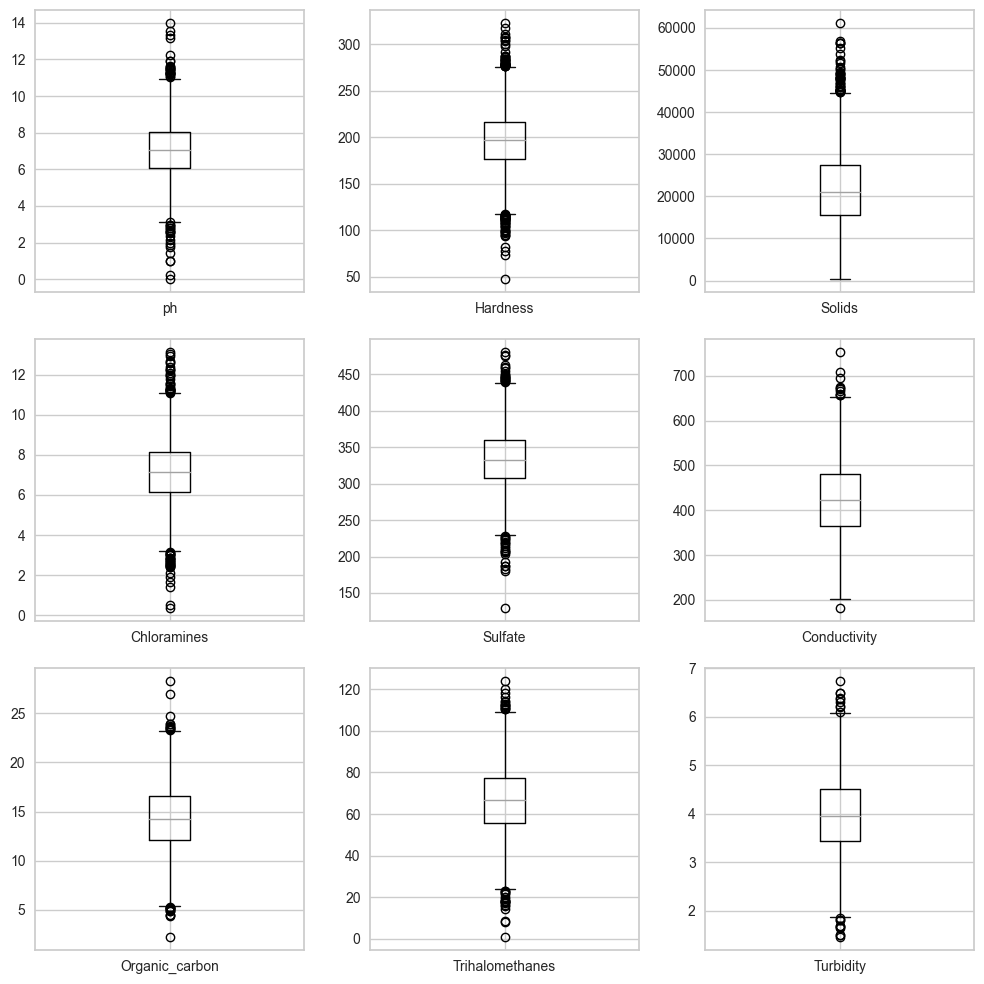

In [47]:
fig, axes = plt.subplots(3,3, figsize=(10, 10))
for i,el in enumerate(cuantitativas):
    a = df.boxplot(el, ax=axes.flatten()[i])


#fig = plt.figure(figsize=(15,5),facecolor='w') 
# fig.delaxes(axes[2,2]) # remove empty subplot
plt.tight_layout() 

plt.show()

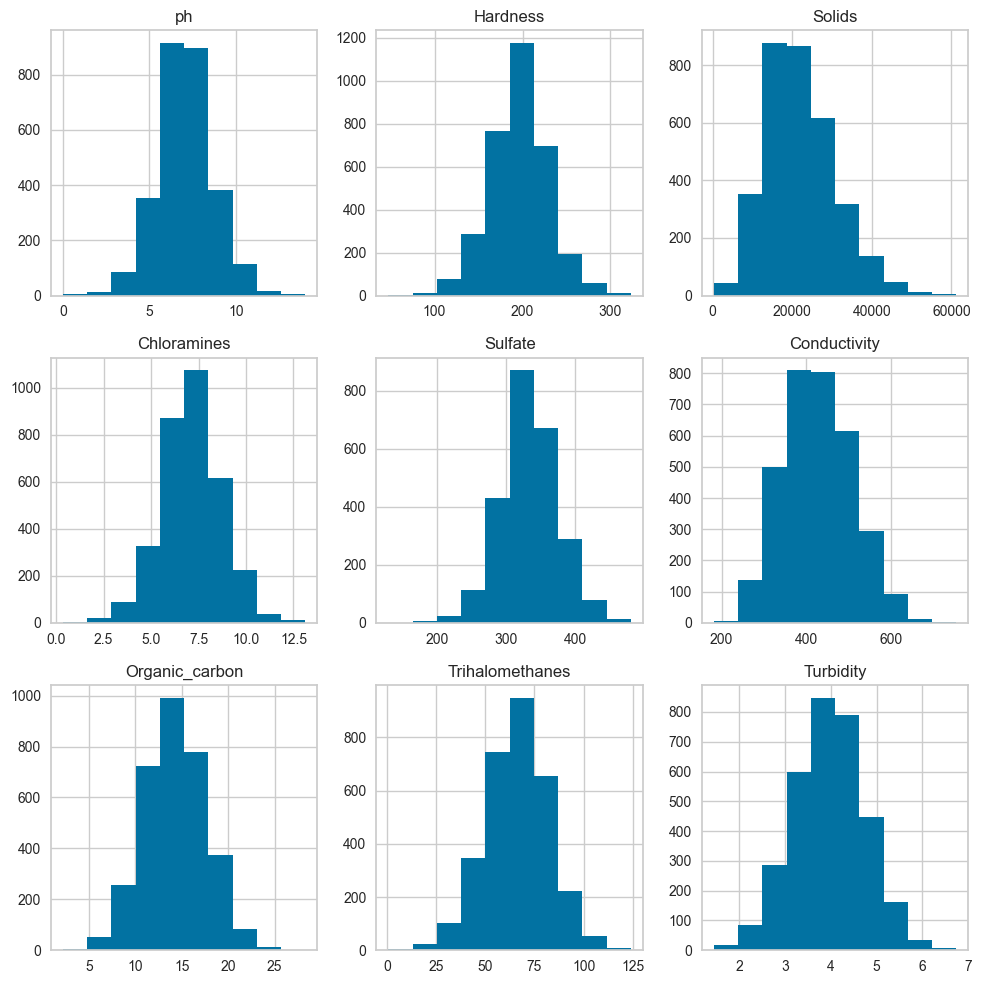

In [49]:
fig, axes = plt.subplots(3,3, figsize=(10, 10))
for i,el in enumerate(cuantitativas):
    a = df.hist(el, ax=axes.flatten()[i])


#fig = plt.figure(figsize=(15,5),facecolor='w') 
# fig.delaxes(axes[2,2]) # remove empty subplot
plt.tight_layout() 

plt.show()

In [ ]:
Observaciones

- Se puede observar que los datos aparentemente se comportan muy parecido a una distribución normal tomando en cuenta la centralidad que asimilan.
- Solids es la única posible excepción al tener un sesgo hacia la izquierda, aparentando una distribución Poisson.

In [48]:
outliers = []
for i,el in enumerate(cuantitativas):
  std_value= df[el].std()
  print(std_value)
  # print(df.loc[(df[el] < -3  * std_value) | (df[el] > 3 * std_value)])
  outliers.append(df.loc[(df[el] < df[el].mean() - 3  * std_value) | (df[el] > df[el].mean() + 3 * std_value)])
  # print(df.loc[np.abs( (df[el] - df[el].mean()) / df[el].std())  > 3,[el]].count())
  # outliers.append(df.loc[np.abs( (df[el] - df[el].mean()) / df[el].std())  > 3, [el]])
  # display(outliers[i])
  print("Cantidad de outliers de",el,":")
  print(outliers[i].count().sum(), "de", df[el].count().sum(),"datos")
  print("Es decir, el",outliers[i].count().sum() * 100 / df[el].count().sum(),"%" )
  print("\n")

1.5943195187088117
Cantidad de outliers de ph :
154 de 2785 datos
Es decir, el 5.529622980251347 %


32.879761476294185
Cantidad de outliers de Hardness :
172 de 3276 datos
Es decir, el 5.25030525030525 %


8768.570827785932
Cantidad de outliers de Solids :
189 de 3276 datos
Es decir, el 5.769230769230769 %


1.58308488903971
Cantidad de outliers de Chloramines :
192 de 3276 datos
Es decir, el 5.86080586080586 %


41.416840461672685
Cantidad de outliers de Sulfate :
168 de 2495 datos
Es decir, el 6.733466933867735 %


80.82406405111182
Cantidad de outliers de Conductivity :
67 de 3276 datos
Es decir, el 2.045177045177045 %


3.308161999126868
Cantidad de outliers de Organic_carbon :
38 de 3276 datos
Es decir, el 1.15995115995116 %


16.17500842221865
Cantidad de outliers de Trihalomethanes :
115 de 3114 datos
Es decir, el 3.692999357739242 %


0.7803824084854116
Cantidad de outliers de Turbidity :
79 de 3276 datos
Es decir, el 2.4114774114774113 %




In [ ]:
Observaciones
- La cantidad de outliers supera muy poco el umbral de 5% para la distribución normal en algunos casos mientras que en otros son muy pocos.

## Correlación entre variables

<AxesSubplot: >

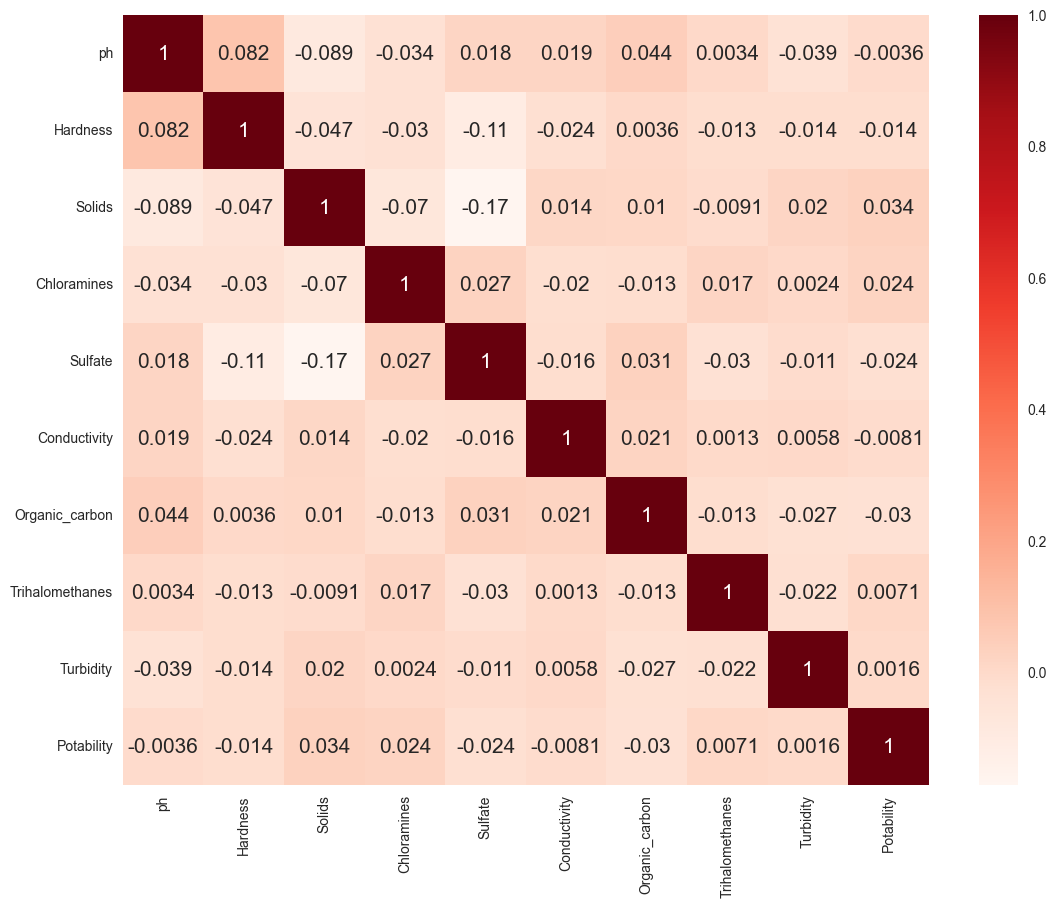

In [50]:
# num_data = df.drop(['nombre'], axis = 1)
plt.figure(figsize=(13,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds,annot_kws = {'fontsize':15})

**Observaciones**

- La correlación entre variables es muy baja en general, por lo que eliminar por depdendencia no será necesario

## Ingeniería / selección de características + limpieza de datos (si es necesario)

### Datos faltantes

Debido a la información proporcionada por la descripción de las variables, es posible la imputación de datos basándonos en cada caso específico de las variables ph, Sulfate y Trihalomethanes

In [52]:
# Calcular la media de 'ph' para cada valor de 'potability' en los rangos aceptables
isPotableMean = df.loc[(df["Potability"] == 1) & (df["ph"] > 6.5) | (df["Potability"] == 1) & (df["ph"] < 8.5),'ph'].mean()
notPotableMean = df.loc[(df["Potability"] == 0) & (df["ph"] < 6.5) | (df["Potability"] == 0) & (df["ph"] > 8.5),'ph'].mean()


# Llenar los valores NaN en 'ph' con la media correspondiente a cada 'potability'
df.loc[df['ph'].isna() & (df["Potability"] == 1), ['ph']] = isPotableMean
df.loc[df['ph'].isna() & (df["Potability"] == 0), ['ph']] = notPotableMean

In [53]:
# Calcular la media de 'Sulfate' para cada valor de 'potability'
ph_mean_by_potability = df.groupby('Potability')['Sulfate'].mean()

# Llenar los valores NaN en 'Sulfate' con la media correspondiente a cada 'potability'
df.loc[df['Sulfate'].isna(), 'Sulfate'] = df['Potability'].map(ph_mean_by_potability)

In [54]:
# Calcular la media de 'Trihalomethanes' para cada valor de 'potability' en los rangos aceptables
isPotableMean = df.loc[(df["Potability"] == 1) & (df["Trihalomethanes"] < 80),'Trihalomethanes'].mean()
notPotableMean = df.loc[(df["Potability"] == 0) & (df["Trihalomethanes"] > 80),'Trihalomethanes'].mean()

# Llenar los valores NaN en 'Trihalomethanes' con la media correspondiente a cada 'potability'
df.loc[df['Trihalomethanes'].isna() & (df["Potability"] == 1), ['Trihalomethanes']] = isPotableMean
df.loc[df['Trihalomethanes'].isna() & (df["Potability"] == 0), ['Trihalomethanes']] = notPotableMean

61.04954976899859


In [55]:
df.drop_duplicates().count()

No existen datos duplicados

In [56]:
df.count()

ph                 3276
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            3276
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3276
Turbidity          3276
Potability         3276
dtype: int64

Ya no existen datos faltantes

### Estandarización de datos

In [57]:
from sklearn import preprocessing

std=preprocessing.StandardScaler()
df[cuantitativas] = std.fit_transform(df[cuantitativas])

In [58]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,-0.164790,0.259195,-0.139471,0.112415,0.961017,1.708954,-1.180651,1.225831,-1.286298,0
1,-2.268286,-2.036414,-0.385987,-0.307694,0.021560,2.062575,0.270597,-0.657753,0.684218,0
2,0.709623,0.847665,-0.240047,1.360594,0.021560,-0.094032,0.781117,-0.037854,-1.167365,0
3,0.857493,0.547651,0.000493,0.592008,0.639206,-0.778830,1.255134,2.045976,0.848412,0
4,1.384351,-0.464429,-0.460249,-0.363698,-0.654379,-0.343939,-0.824357,-2.152431,0.138786,0


### Separación de datos en subconjuntos train, test y val

In [103]:
y=df['Potability']
X=df.drop(columns=['Potability'], axis=1)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.12, random_state=42)

In [107]:
print(y.shape)
print(y_test.shape)

(3276,)
(328,)


## Métricas a considerar para la evaluación de los próxmos modelos

Debido a que se trata de la potabilidad del agua, lo coherente en esta situación es evaluar los modelos bajo la precisión de estos al predecir los Verdaderos Positivos, ya que es más importante clasificar con el menor fallo posible el agua que sí es potable, aun cuando haya casos que se hayan clasificado no potables cuando sí lo eran

## Deep Learning

Como primer modelo para la clasificación de la potabilidad del agua se creó una red neuronal de tres capas.

In [201]:

run = neptune.init_run(
 project="exordark/examen1",
    api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiJiMWI1NGI4YS03YjU0LTQ4YTItOTU4OS00ZDNlNjYxZjc1ZjgifQ==",
    name="classification-model",
    tags=["NeuralNetwork", "classification"],
)

https://app.neptune.ai/exordark/examen1/e/EX-19


In [202]:
from neptune.integrations.tensorflow_keras import NeptuneCallback

neural_model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Dense(64, activation=tf.keras.activations.relu, input_shape=(9,)),
        tf.keras.layers.Dense(32, activation=tf.keras.activations.relu),
        tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid),
    ]
)
#         tf.keras.layers.Dropout(0.5),

optimizer = tf.keras.optimizers.SGD(
    learning_rate=0.005,
    momentum=0.4,
)

neptune_cbk = NeptuneCallback(run=run)  # base_namespace defaults to "training"

params = {"loss":"binary_crossentropy", "lr": 0.005, "epochs": 100, "batch_size": 64, "metrics":[tf.keras.metrics.Precision()]}

neural_model.compile(optimizer=optimizer, loss=params["loss"], metrics=params["metrics"])

neural_model.fit(
    X_train,
    y_train,
    epochs=params["epochs"],
    batch_size=params["batch_size"],
    callbacks=[neptune_cbk],
)

Epoch 1/100
Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x000002301EF3CA60>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x000002301EF3CA60>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. 

In [203]:
run["hyper-parameters"] = params

In [204]:
run.stop()

Shutting down background jobs, please wait a moment...
Done!
Waiting for the remaining 97 operations to synchronize with Neptune. Do not kill this process.
All 97 operations synced, thanks for waiting!
Explore the metadata in the Neptune app:
https://app.neptune.ai/exordark/examen1/e/EX-19/metadata


In [205]:
y_pred = neural_model.predict(X_val)

Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x000002301EF3C0D0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: Unable to locate the source code of <function Model.make_predict_function.<locals>.predict_function at 0x000002301EF3C0D0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Orig

In [207]:
threshold = 0.5
y_pred_binary = np.where(y_pred > threshold, 1, 0)


In [211]:
cm = confusion_matrix(y_val, y_pred_binary)

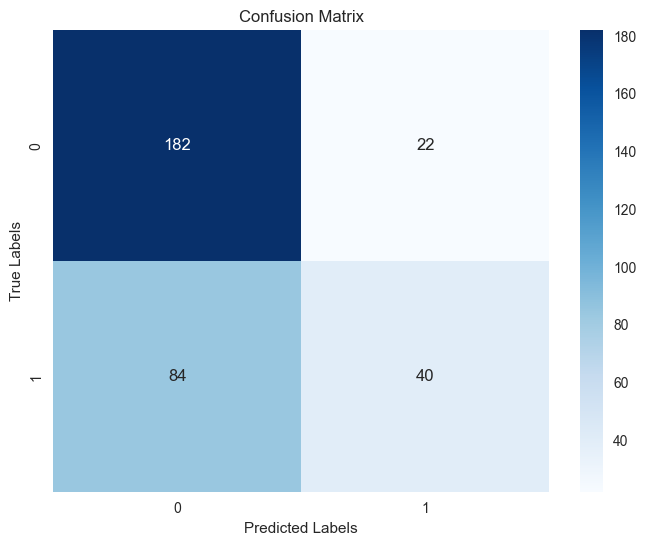

In [213]:
# Crear un mapa de calor con la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Agregar etiquetas, título y ejes
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Mostrar el mapa de calor
plt.show()

In [217]:
positive_precision = 40 / (40 + 84)
positive_precision

0.3225806451612903

Aún cuando la precisión en los verdaderos negativos es alta y ayudaría a elegir menos las opciones no potables, en la práctica no nos ayuda mucho ya que sigue habiendo incertidumbre a la hora de elegir entre el agua que no fue clasificada por este modelo, obteniendo un 0.32 de precisión

Por esta razón se decidió explorar una alternativa como modelo de machine learning que ayude con esta tarea

## Modelos de machine learning

Se realizó una exploración inicial ajustando los hiperparámetros con GridSearchCV de modelos para comparar los resultados y elegir un mejor modelo. Los explorados con su justificación son los siguientes:

- Regresión logística: Aunque no aparenta haber linealidad en los datos se utilizó por su utilidad al predecir variables binarias.

- Random Forest Classifier: Debido a la poca correlación de datos, será útil al no verse notablemente afectado por las variables que no sean relevantes.

- K-Nearest Neighbors (KNN): Útil con esta base de datos debido a que su tamaño poría considerarse pequeño o mediano.

- Tanto Gradient Boosting Classifier y Support Vector Machine fueron añadidos a la comparación por ser buenas opciones en general en los problemas de clasificación

### Gradient Boosting Classifier

In [ ]:
hyperparameters = {
    "learning_rate": [0.01, 0.05, 0.1, 0.15],
    "min_samples_split": [0.1, 3],
    "min_samples_leaf": [0.1, 2],
    "max_depth":[3,8],
    "n_estimators":[10,120]
}

In [ ]:
gbc = GradientBoostingClassifier()

gbc_GSCV = GridSearchCV(gbc, hyperparameters, cv=5)

models = gbc_GSCV.fit(X_train,y_train)

best_model = models.best_estimator_
best_params = models.best_estimator_.get_params()

In [ ]:
run = neptune.init_run(
 project="exordark/examen1",
    api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiJiMWI1NGI4YS03YjU0LTQ4YTItOTU4OS00ZDNlNjYxZjc1ZjgifQ==",
    name="classification-model",
    tags=["GradientBoostingClassifier", "classification"],
)

<ipython-input-64-e2734cf84ce3>:1: NeptuneWarning: To avoid unintended consumption of logging hours during interactive sessions, the following monitoring options are disabled unless set to 'True' when initializing the run: 'capture_stdout', 'capture_stderr', and 'capture_hardware_metrics'.
  run = neptune.init_run(


https://app.neptune.ai/exordark/examen1/e/EX-4


In [ ]:
run["hyper-parameters"] = best_params

<ipython-input-65-08bf981ab722>:1: NeptuneUnsupportedType: You're attempting to log a type that is not directly supported by Neptune (<class 'NoneType'>).
        Convert the value to a supported type, such as a string or float, or use stringify_unsupported(obj)
        for dictionaries or collections that contain unsupported values.
        For more, see https://docs.neptune.ai/help/value_of_unsupported_type
  run["hyper-parameters"] = best_params


In [ ]:
run["cls_summary"] = npt_utils.create_classifier_summary(best_model, X_train, X_val, y_train, y_val)

In [ ]:
run.stop()


Shutting down background jobs, please wait a moment...
Done!
Waiting for the remaining 52 operations to synchronize with Neptune. Do not kill this process.
All 52 operations synced, thanks for waiting!
Explore the metadata in the Neptune app:
https://app.neptune.ai/exordark/examen1/e/EX-4/metadata


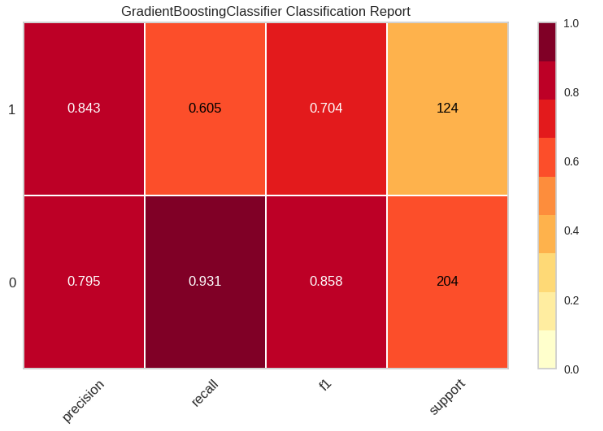

### Logistic Regression

In [ ]:

logistic_regresion = LogisticRegression(random_state = 42)

logistic_regresion.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [ ]:

run = neptune.init_run(
 project="exordark/examen1",
    api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiJiMWI1NGI4YS03YjU0LTQ4YTItOTU4OS00ZDNlNjYxZjc1ZjgifQ==",
    name="classification-model",
    tags=["logistic_regresion", "classification"],
)

https://app.neptune.ai/exordark/examen1/e/EX-5


In [ ]:
run["cls_summary"] = npt_utils.create_classifier_summary(logistic_regresion, X_train, X_val, y_train, y_val)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
run.stop()


Shutting down background jobs, please wait a moment...
Done!
Waiting for the remaining 32 operations to synchronize with Neptune. Do not kill this process.
All 32 operations synced, thanks for waiting!
Explore the metadata in the Neptune app:
https://app.neptune.ai/exordark/examen1/e/EX-5/metadata


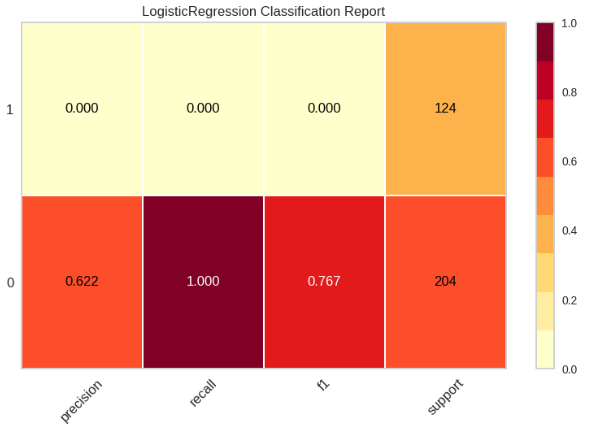

### Random Forest Classifier

In [ ]:


hyperparameters = {
 'max_depth': [2, 10, 30, 50, 70, 90 ],
 'n_estimators': [100, 200, 600, 1000, 1400, 1800]
}

 # create regressor object
rfc = RandomForestClassifier()
  
rfc_GSCV = GridSearchCV(rfc, hyperparameters, cv=5)

models = rfc_GSCV.fit(X_train,y_train)

best_model = models.best_estimator_
best_params = models.best_estimator_.get_params()

In [ ]:

run = neptune.init_run(
 project="exordark/examen1",
    api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiJiMWI1NGI4YS03YjU0LTQ4YTItOTU4OS00ZDNlNjYxZjc1ZjgifQ==",
    name="classification-model",
    tags=["RandomForestClassifier", "classification"],
)

https://app.neptune.ai/exordark/examen1/e/EX-6


In [ ]:
run["hyper-parameters"] = best_params

In [ ]:
run["cls_summary"] = npt_utils.create_classifier_summary(best_model, X_train, X_val, y_train, y_val)

In [ ]:
run.stop()


Shutting down background jobs, please wait a moment...
Done!
Waiting for the remaining 48 operations to synchronize with Neptune. Do not kill this process.
All 48 operations synced, thanks for waiting!
Explore the metadata in the Neptune app:
https://app.neptune.ai/exordark/examen1/e/EX-6/metadata


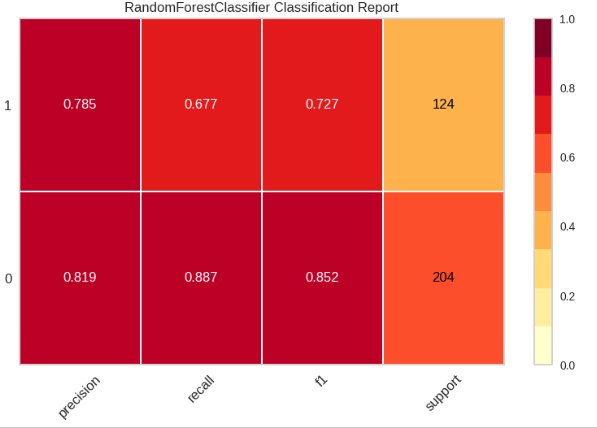

### Support Vector Machine

In [61]:
from sklearn import svm

hyperparameters = {'C': [0.1, 100, 1000], 
              'gamma': [1, 0.1, 0.001,]} 

# create the model 
svmachine = svm.SVC()

svmachine_GSCV = GridSearchCV(svmachine, hyperparameters, cv=5)

models = svmachine_GSCV.fit(X_train,y_train)

best_model = models.best_estimator_
best_params = models.best_estimator_.get_params()


In [62]:

run = neptune.init_run(
 project="exordark/examen1",
    api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiJiMWI1NGI4YS03YjU0LTQ4YTItOTU4OS00ZDNlNjYxZjc1ZjgifQ==",
    name="classification-model",
    tags=["SupportVectorMachine", "classification"],
)

C:\Users\corra\.conda\envs\tf-gpu\lib\site-packages\neptune\common\warnings.py:62: NeptuneWarning: To avoid unintended consumption of logging hours during interactive sessions, the following monitoring options are disabled unless set to 'True' when initializing the run: 'capture_stdout', 'capture_stderr', and 'capture_hardware_metrics'.
  warnings.warn(


https://app.neptune.ai/exordark/examen1/e/EX-7


In [63]:
run["hyper-parameters"] = best_params

C:\Users\corra\.conda\envs\tf-gpu\lib\site-packages\neptune\common\warnings.py:62: NeptuneUnsupportedType: You're attempting to log a type that is not directly supported by Neptune (<class 'NoneType'>).
        Convert the value to a supported type, such as a string or float, or use stringify_unsupported(obj)
        for dictionaries or collections that contain unsupported values.
        For more, see https://docs.neptune.ai/help/value_of_unsupported_type
  warnings.warn(


This classifier does not provide predictions probabilities. Error: predict_proba is not available when  probability=False
Did not log ROC-AUC chart. Error no curves will be drawn; set binary=True.
Did not log Precision-Recall chart: this classifier does not provide predictions probabilities.Error predict_proba is not available when  probability=False


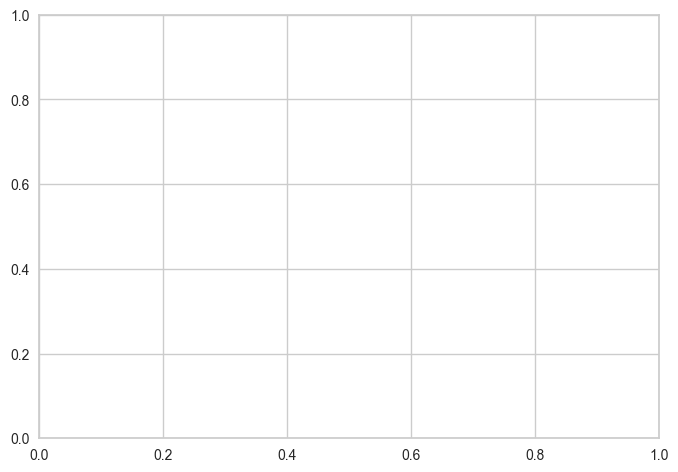

In [64]:
run["cls_summary"] = npt_utils.create_classifier_summary(best_model, X_train, X_val, y_train, y_val)

In [65]:
run.stop()


Shutting down background jobs, please wait a moment...
Done!
Waiting for the remaining 42 operations to synchronize with Neptune. Do not kill this process.
All 42 operations synced, thanks for waiting!
Explore the metadata in the Neptune app:
https://app.neptune.ai/exordark/examen1/e/EX-7/metadata


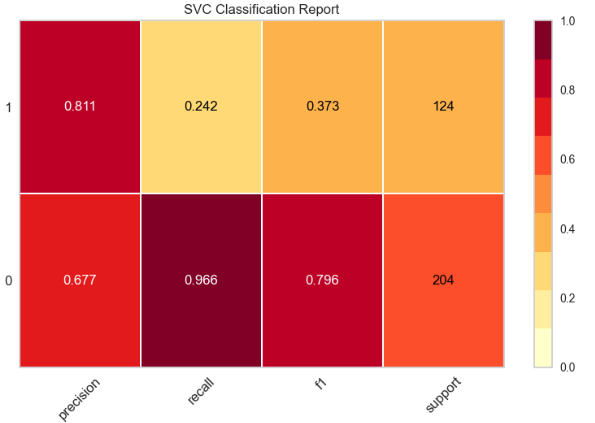

### K-Neighbors Classifier

In [66]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [67]:

leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]

hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

knn = KNeighborsClassifier()

knn_GSCV = GridSearchCV(knn, hyperparameters, cv=5)

models = knn_GSCV.fit(X_train,y_train)

best_model = models.best_estimator_
best_params = models.best_estimator_.get_params()

In [68]:

run = neptune.init_run(
 project="exordark/examen1",
    api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiJiMWI1NGI4YS03YjU0LTQ4YTItOTU4OS00ZDNlNjYxZjc1ZjgifQ==",
    name="classification-model",
    tags=["KNeighborsClassifier", "classification"],
)

https://app.neptune.ai/exordark/examen1/e/EX-8


In [69]:
run["hyper-parameters"] = best_params

In [70]:
run["cls_summary"] = npt_utils.create_classifier_summary(best_model, X_train, X_val, y_train, y_val)

In [71]:
run.stop()


Shutting down background jobs, please wait a moment...
Done!
Waiting for the remaining 31 operations to synchronize with Neptune. Do not kill this process.
All 31 operations synced, thanks for waiting!
Explore the metadata in the Neptune app:
https://app.neptune.ai/exordark/examen1/e/EX-8/metadata


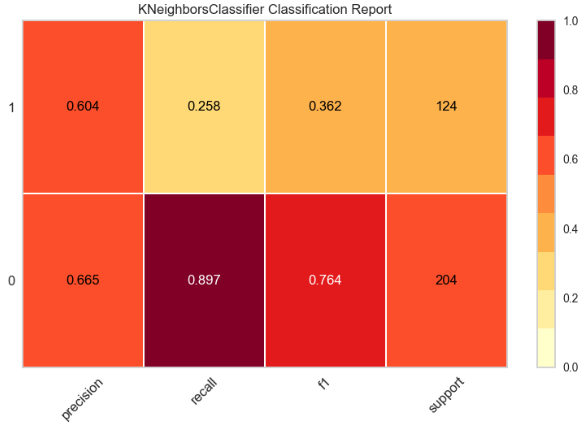

## Mejor modelo - Gradient Boosting Classifier

Tras comparar los resultados, se obtuvo que el mejor modelo (en base a su precisión positiva) es Gradient Boosting Classifier, con una precisión del 0.843.
Por esta razón es el modelo elegido y será puesto a prueba con el subconjunto de datos "test"

Se utilizarán los mejores hiperparámetros obtenidos con GridSearchCV logeados a Neptune.ai

In [218]:
hyperparameters = {
    "learning_rate": 0.05,
    "min_samples_split": 0.1,
    "min_samples_leaf": 2,
    "max_depth": 3,
    "n_estimators":120
}

In [219]:
gbc = GradientBoostingClassifier(**hyperparameters)

gbc.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.05, min_samples_leaf=2,
                           min_samples_split=0.1, n_estimators=120)

In [220]:
run = neptune.init_run(
 project="exordark/examen1",
    api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiJiMWI1NGI4YS03YjU0LTQ4YTItOTU4OS00ZDNlNjYxZjc1ZjgifQ==",
    name="classification-model",
    tags=["GradientBoostingClassifierBestModel", "classification"],
)

https://app.neptune.ai/exordark/examen1/e/EX-20


In [221]:
run["hyper-parameters"] = hyperparameters

In [222]:
run["cls_summary"] = npt_utils.create_classifier_summary(gbc, X_train, X_test, y_train, y_test)

In [223]:
run.stop()


Shutting down background jobs, please wait a moment...
Done!
Waiting for the remaining 42 operations to synchronize with Neptune. Do not kill this process.
All 42 operations synced, thanks for waiting!
Explore the metadata in the Neptune app:
https://app.neptune.ai/exordark/examen1/e/EX-20/metadata


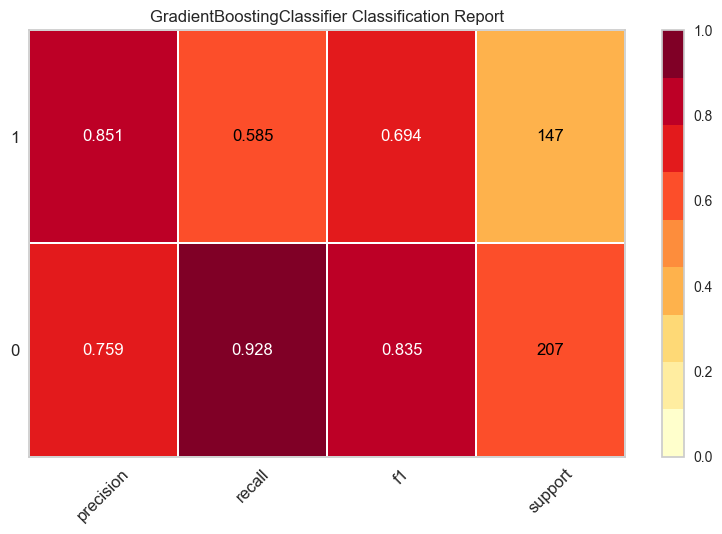

A comparación del mismo modelo con el subconjunto de validación, la precisión esperada mejoró un poco, de 0.843 a 0.851
Este resultado junto con anteriores nos muestra que se logró una generalización y se puede esperar que la predicción de nuevos valores sea la esperada.

## Resultado

Se es posible confiar en un 84% de confianza en el mejor modelo al predecir si que cierta agua en base a sus caraterísticas es potable.